In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("processed_data.csv",low_memory=False, encoding='latin1')

In [4]:
df.head()

,label,subject,email_to,email_from,message
0,spam,"Generic Cialis, branded quality@",the00@speedy.uwaterloo.ca,"""Tomas Jacobs"" <RickyAmes@aol.com>",Content-Type: text/html;\nContent-Transfer-Enc...
1,ham,Typo in /debian/README,debian-mirrors@lists.debian.org,Yan Morin <yan.morin@savoirfairelinux.com>,"Hi, i've just updated from the gulus and I che..."
2,spam,authentic viagra,<the00@plg.uwaterloo.ca>,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...","Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,spam,Nice talking with ya,opt4@speedy.uwaterloo.ca,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>","Hey Billy, \n\nit was really fun going out the..."
4,spam,or trembling; stomach cramps; trouble in sleep...,ktwarwic@speedy.uwaterloo.ca,"""Christi T. Jernigan"" <dcube@totalink.net>",Content-Type: multipart/alternative;\n ...


In [5]:
df.shape

(75071, 5)

# 1. data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75071 entries, 0 to 75070
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       75071 non-null  object
 1   subject     74282 non-null  object
 2   email_to    74524 non-null  object
 3   email_from  75071 non-null  object
 4   message     73586 non-null  object
dtypes: object(5)
memory usage: 2.9+ MB


In [7]:
df.drop(columns=['email_to','email_from','subject'],inplace=True)

In [8]:
#missing values
df.isnull().sum()  # or pd.isnull(df).sum()

label         0
message    1485
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(73586, 2)

In [11]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
#check for duplicate values
df.duplicated().sum()

14797

In [13]:
#drop duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(58789, 2)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['label'] = encoder.fit_transform(df['label'])

In [18]:
df.head()

,label,message
0,1,Content-Type: text/html;\nContent-Transfer-Enc...
1,0,"Hi, i've just updated from the gulus and I che..."
2,1,"Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,1,"Hey Billy, \n\nit was really fun going out the..."
4,1,Content-Type: multipart/alternative;\n ...


# 2. EDA

In [19]:
df.head()

,label,message
0,1,Content-Type: text/html;\nContent-Transfer-Enc...
1,0,"Hi, i've just updated from the gulus and I che..."
2,1,"Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,1,"Hey Billy, \n\nit was really fun going out the..."
4,1,Content-Type: multipart/alternative;\n ...


In [20]:
df['label'].value_counts()

label
1    34414
0    24375
Name: count, dtype: int64

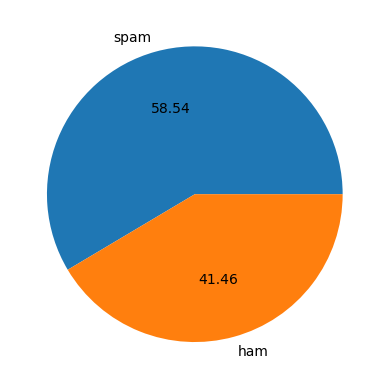

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['spam','ham'], autopct="%0.2f")
plt.show()

In [22]:
!pip install nltk
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/moulshridaroch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#new col with num of chars in each message
df['num_chars'] = df['message'].apply(len)

In [25]:
df.head()

,label,message,num_chars
0,1,Content-Type: text/html;\nContent-Transfer-Enc...,225
1,0,"Hi, i've just updated from the gulus and I che...",728
2,1,"Content-Type: text/plain;\n\tcharset=""iso-8859...",410
3,1,"Hey Billy, \n\nit was really fun going out the...",649
4,1,Content-Type: multipart/alternative;\n ...,8192


In [26]:
#new col with num of words in each message
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,label,message,num_chars,num_words
0,1,Content-Type: text/html;\nContent-Transfer-Enc...,225,47
1,0,"Hi, i've just updated from the gulus and I che...",728,116
2,1,"Content-Type: text/plain;\n\tcharset=""iso-8859...",410,80
3,1,"Hey Billy, \n\nit was really fun going out the...",649,144
4,1,Content-Type: multipart/alternative;\n ...,8192,1109


In [28]:
#new col with num of words in each message
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,label,message,num_chars,num_words,num_sentences
0,1,Content-Type: text/html;\nContent-Transfer-Enc...,225,47,2
1,0,"Hi, i've just updated from the gulus and I che...",728,116,8
2,1,"Content-Type: text/plain;\n\tcharset=""iso-8859...",410,80,2
3,1,"Hey Billy, \n\nit was really fun going out the...",649,144,3
4,1,Content-Type: multipart/alternative;\n ...,8192,1109,57


In [30]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,58789.000000,58789.000000,58789.000000
mean,2755.765313,368.239603,12.930786
std,2792.296426,362.315748,13.892877
min,1.000000,1.000000,1.000000
25%,725.000000,131.000000,5.000000
50%,1410.000000,236.000000,8.000000
75%,3980.000000,462.000000,15.000000
max,8192.000000,3157.000000,168.000000


In [31]:
# ham
df[df['label']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,24375.000000,24375.00000,24375.000000
mean,2240.023877,412.76521,12.459077
std,2159.696358,400.15064,12.982168
min,6.000000,1.00000,1.000000
25%,833.500000,152.00000,5.000000
50%,1393.000000,258.00000,8.000000
75%,2705.000000,519.00000,14.000000
max,8192.000000,3157.00000,168.000000


In [32]:
print(df.columns)


Index(['label', 'message', 'num_chars', 'num_words', 'num_sentences'], dtype='object')


In [33]:
# spam
df[df['label']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,34414.000000,34414.000000,34414.000000
mean,3121.058436,336.702679,13.264892
std,3113.531266,329.310428,14.494267
min,1.000000,1.000000,1.000000
25%,647.000000,122.000000,4.000000
50%,1425.000000,224.000000,8.000000
75%,6296.750000,429.000000,15.000000
max,8192.000000,2492.000000,163.000000


In [34]:
!pip install seaborn

In [35]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

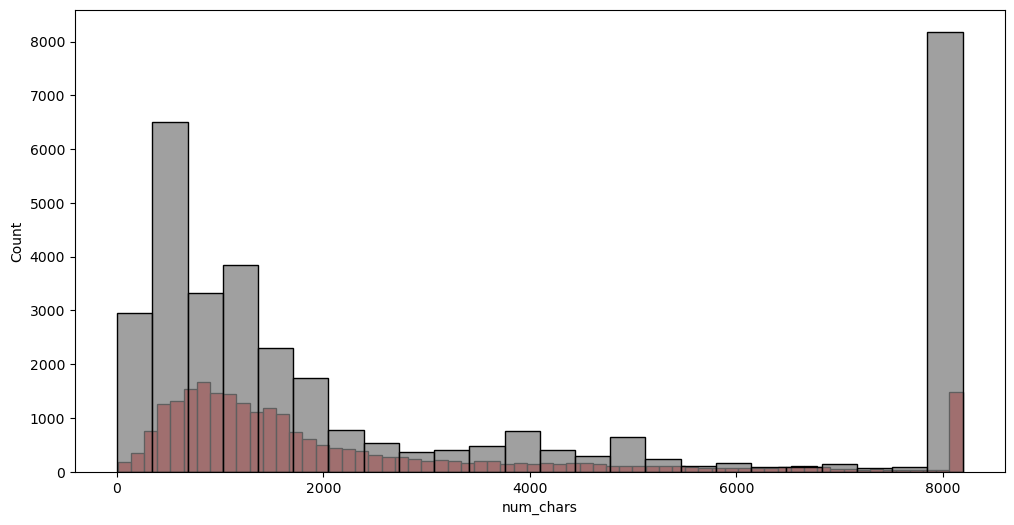

In [36]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label']==0]['num_chars'], color = 'red')
sns.histplot(df[df['label']==1]['num_chars'], color = 'grey')

<Axes: xlabel='num_words', ylabel='Count'>

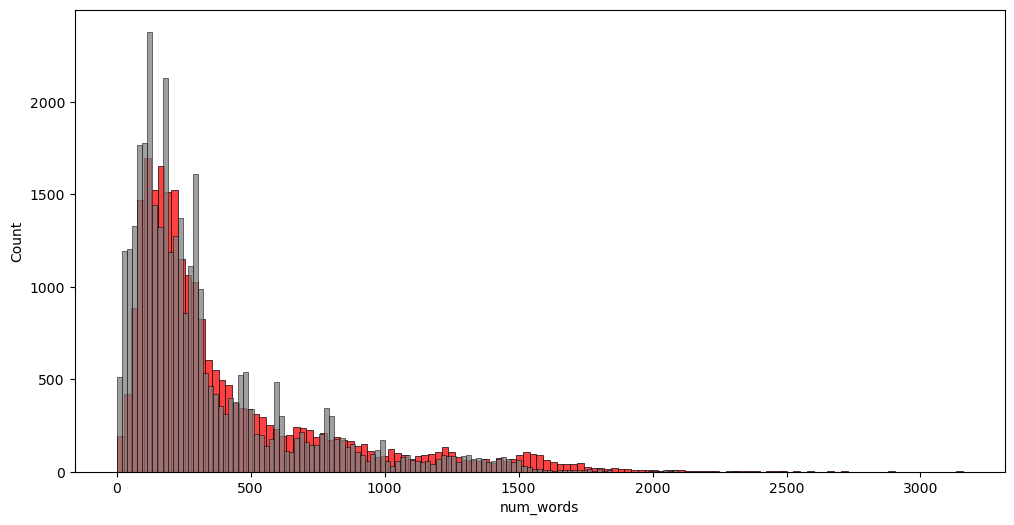

In [37]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label']==0]['num_words'], color = 'red')
sns.histplot(df[df['label']==1]['num_words'], color = 'grey')

<Axes: xlabel='num_sentences', ylabel='Count'>

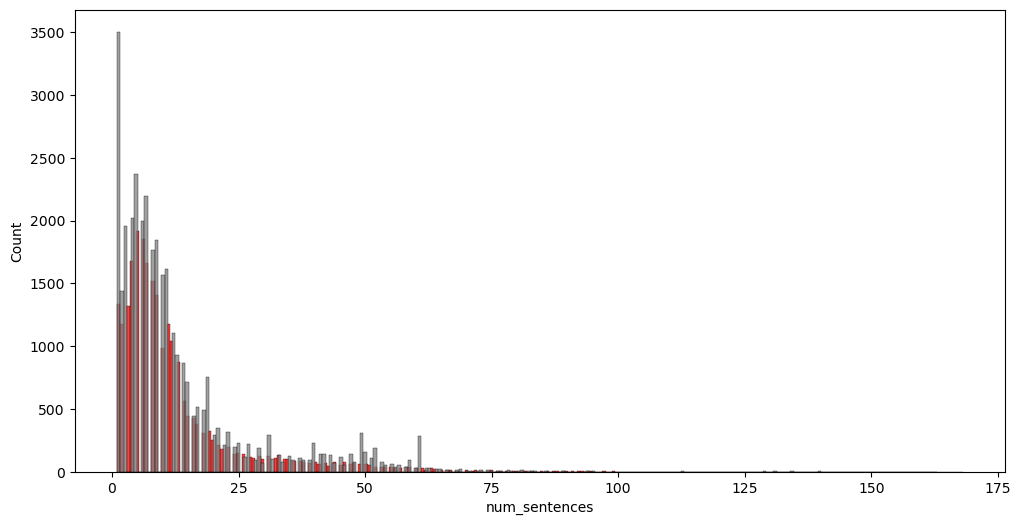

In [38]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['label']==0]['num_sentences'], color = 'red')
sns.histplot(df[df['label']==1]['num_sentences'], color = 'grey')

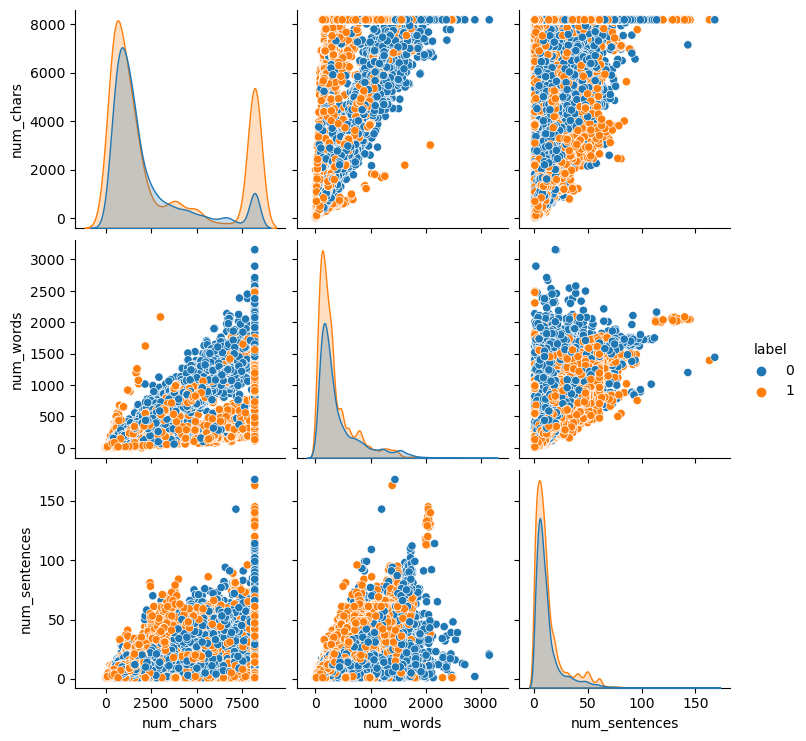

In [39]:
sns.pairplot(df,hue = 'label')

In [40]:
df[['label','num_chars','num_words','num_sentences']].corr()

,label,num_chars,num_words,num_sentences
label,1.000000,0.155446,-0.103426,0.028575
num_chars,0.155446,1.000000,0.677355,0.502863
num_words,-0.103426,0.677355,1.000000,0.729834
num_sentences,0.028575,0.502863,0.729834,1.000000


<Axes: >

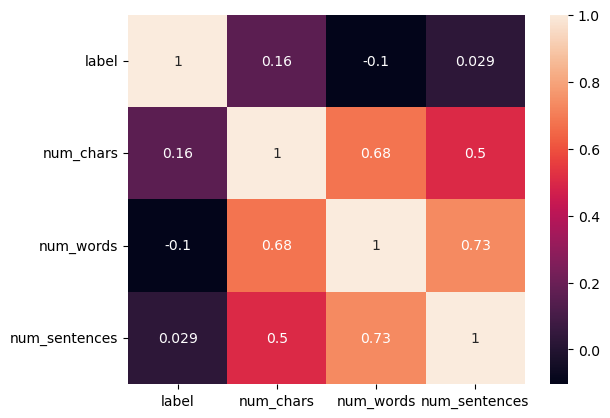

In [41]:
sns.heatmap(df[['label','num_chars','num_words','num_sentences']].corr(), annot = True)

# 3. Text/Data Preprocessing
    -Lower case
    -Tokenization
    -Removing special characters
    -Removing stop words and punctuation
    -Stemming

In [42]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()
import copy

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moulshridaroch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
def transform_text(text):
    text = text.lower()    # turns text to lower case
    text = nltk.word_tokenize(text)       # tokenizes text
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)     #removes special chars and only alpha-numeric words remain
    
    text = copy.deepcopy(y)
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:      #remove stopwords
            y.append(i)
    
    text = copy.deepcopy(y)
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))   #stemming of the text
    
    
    return " ".join(y)  #return list as a string

In [44]:
transform_text("content-typ text/html content-transfer-encod 7bit feel pressur perform rise occas tri v ia gr ..... anxieti thing past back old self")

'7bit feel pressur perform rise occa tri v ia gr anxieti thing past back old self'

In [45]:
df['transformed_text'] = df['message'].apply(transform_text)

In [46]:
df.iloc[0]['transformed_text']

'7bit feel pressur perform rise occas tri v ia gr anxieti thing past back old self'

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width = 300, height = 100, min_font_size = 5, background_color = 'white', max_words = 200)

In [49]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep = " "))

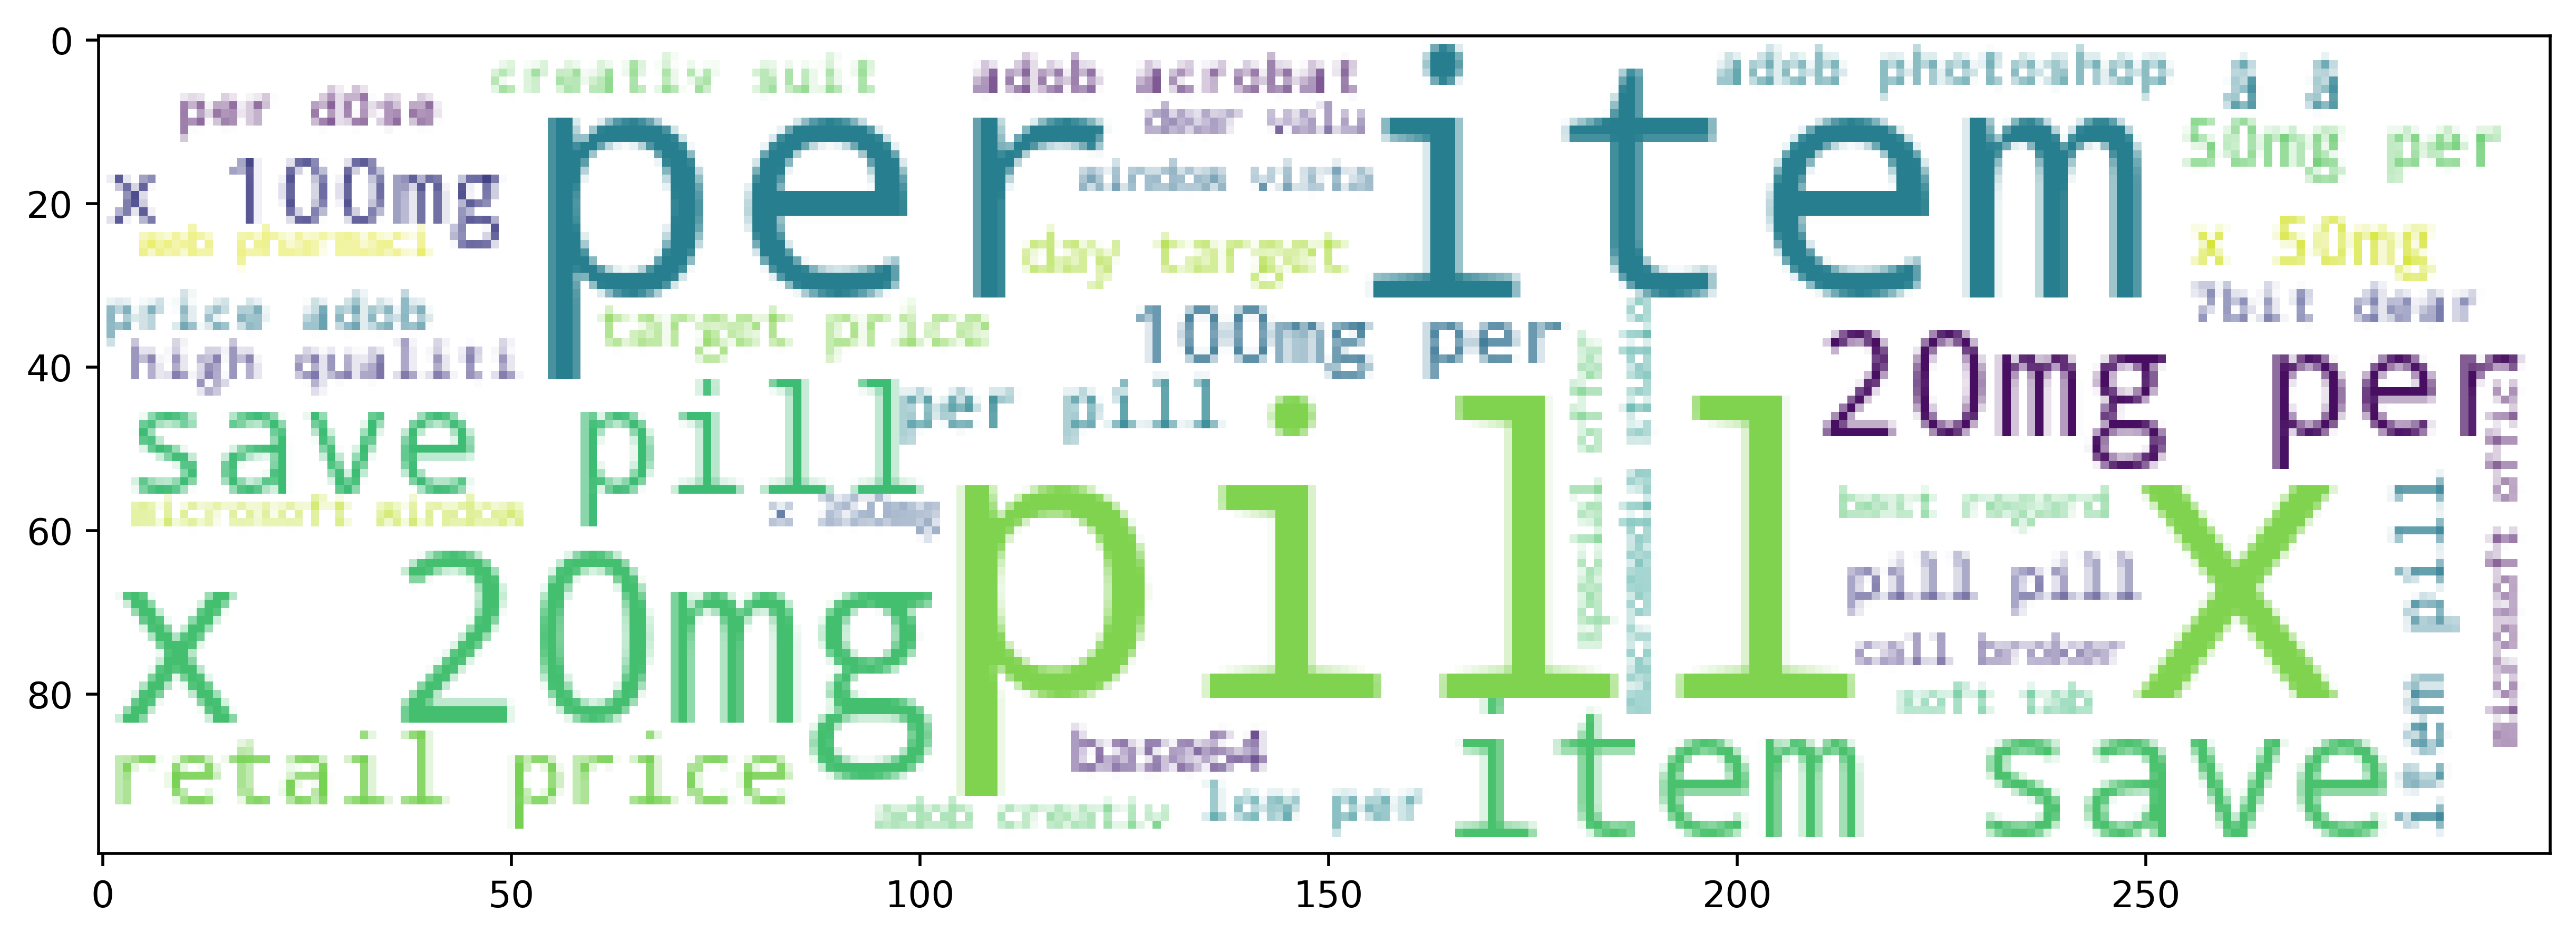

In [50]:
plt.figure(figsize = (12,9), dpi = 500)
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep = " "))

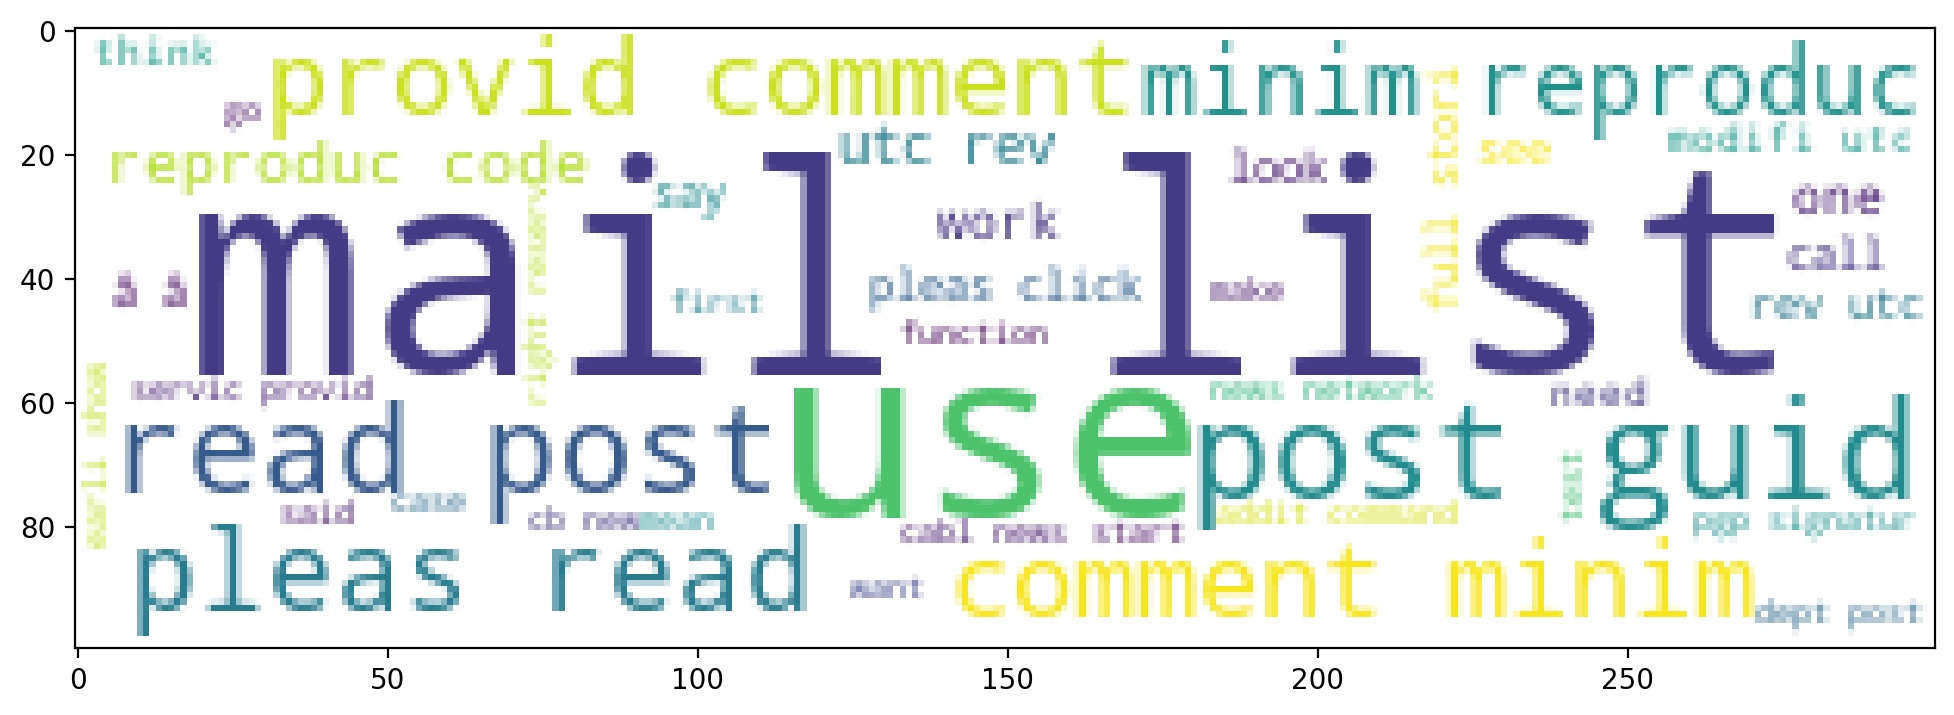

In [52]:
plt.figure(figsize = (12,9), dpi = 200)
plt.imshow(ham_wc)

In [53]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

4947243

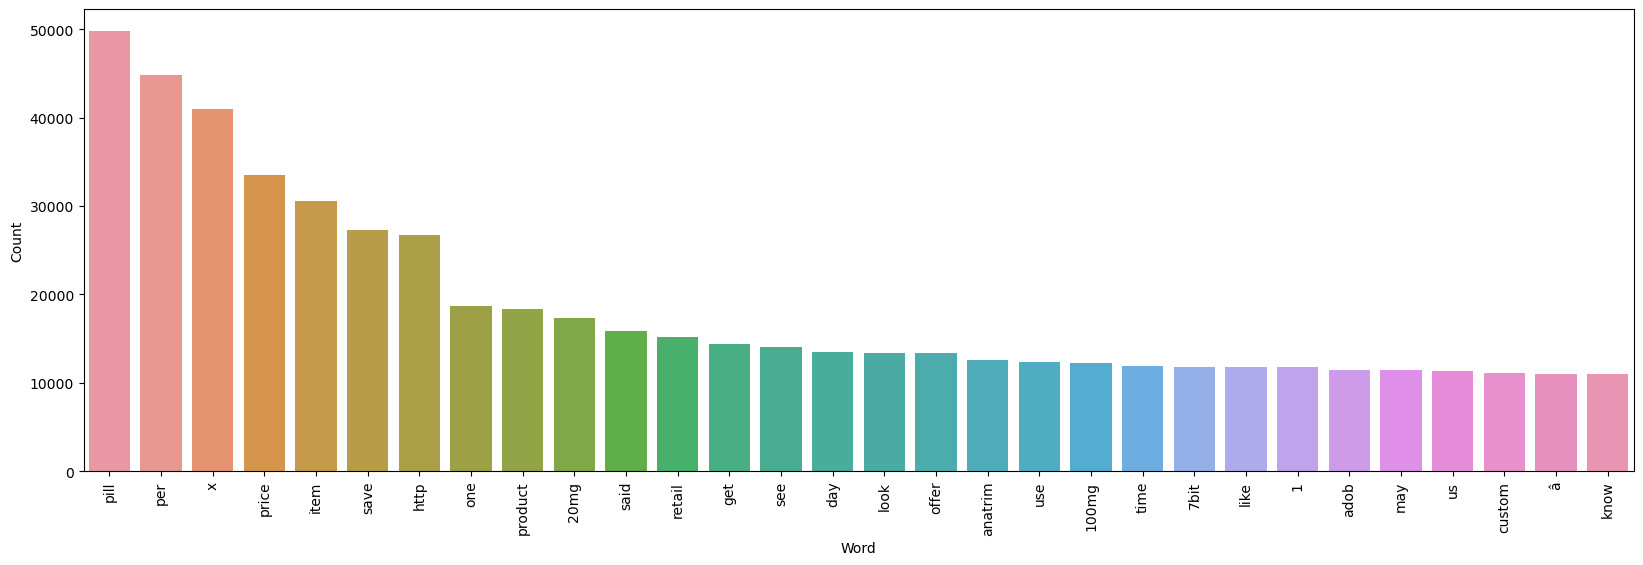

In [55]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])
plt.figure(figsize = (20,6))
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

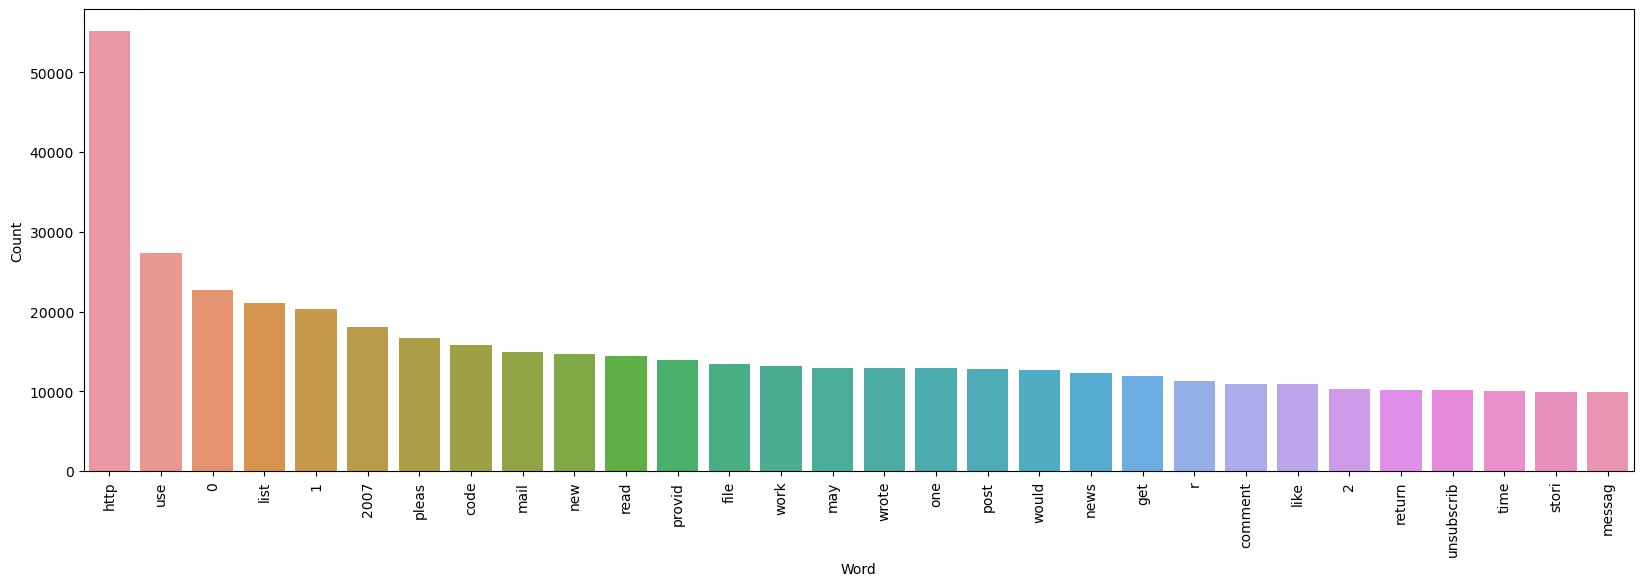

In [57]:
word_counts = Counter(ham_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Count'])
plt.figure(figsize = (20,6))
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=15000)

In [59]:
 x  = tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
x.shape    #messages, words

(58789, 15000)

In [62]:
y = df['label'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.6, random_state = 7)

In [65]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.938169756761354
[[14402   242]
 [ 1939 18691]]
0.987218084825437


In [68]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9665759482905256
[[14430   214]
 [  965 19665]]
0.9892348709693647


In [69]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9555763451834213
[[14185   459]
 [ 1108 19522]]
0.9770281767679295


In [70]:
#tf-idf → MNB

In [72]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))